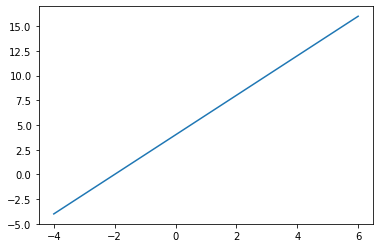

In [1]:
# create some x and y date
from matplotlib import pyplot as plt
x_list = [-4.0, -2.0, 3.0, 4.0, 5.0, 6.0]
y_list = list()
m = 2
b = 4


for x in x_list:
    y = (m*x) + b
    y_list.append(y)
    
plt.plot(x_list, y_list)


In [3]:
def lin_model_single_ele(m, x, b):
    """ Returns a single y for a given x using a line """
    return (m*x) + b

x_list = [1, 2, 3, 4, 5, 6]
y_observed = [2.11, 3.87, 6.01, 7.93, 9.99, 12.12]

y_predicted = []
m = 2
b = 4

for x in x_list:
    y = lin_model_single_ele(m, x, b)
    y_predicted.append(y)

print(y_predicted[0])

6


In [4]:
def calculate_residual(y_pred, y_obs):
    """ Returns the residual of either a point or array """
    return y_pred-y_obs

residuals = []
for i in range(0, len(y_predicted)):
    residual = calculate_residual(y_predicted[i], y_observed[i])
    residuals.append(residual)

print(residuals)

[3.89, 4.13, 3.99, 4.07, 4.01, 3.880000000000001]


In [7]:
from statistics import mean

def calculate_ssr(y_pred, y_obs, deci=4):
    """  Calculates the Sum of Squared Residuals using the observed and predicted y"""
    delta = [calculate_residual(a_i, b_i) for a_i, b_i in zip(y_pred, y_obs)]
    return round(sum([d * d for d in delta]), deci)


def calculate_tss(y_obs, deci=4):
	y_mean = mean(y_obs)
	delta = [y - y_mean for y in y_obs]
	return round(sum([d * d for d in delta]), deci)


def calculate_rsquared(ssr, tss, deci=4):
	return round(1-(ssr/tss), 4)

In [8]:
tss = calculate_tss(y_observed)
ssr = calculate_ssr(y_observed, y_predicted)
r2 = calculate_rsquared(ssr, tss)

print('SSE: %s' % ssr)
print('R^2: %s' % r2)

SSE: 95.8085
R^2: -0.355


In [5]:
def fit_line(x_input, y_observed, m_max=5, c_max=5, print_output=True):

	best_model = {
		'm': None,
		'c': None,
		'SSE': None,
		'R^2': None
	}
	assert len(x_input) == len(y_observed), 'Input vectors have differing lengths'

	tss = calculate_tss(y_observed)

	for m in range(1, m_max):
		for c in range(0, c_max):
			y_model = list()
			for x_i in x_input:
				y_i = (m*x_i) + c
				y_model.append(y_i)

			ssr = calculate_ssr(y_observed, y_model)
			r2 = calculate_rsquared(ssr, tss)
			if print_output:
				print('#####')
				print('using: m=%s and c=%s' % (m, c))
				print('actual: %s' % y_observed)
				print('model: %s' % y_model)
				print('SSE: %s' % ssr)
				print('R^2: %s' % r2)
				print('#####')

			if best_model['SSE'] is None or best_model['SSE'] > ssr:
				best_model['m'] = m
				best_model['c'] = c
				best_model['SSE'] = ssr
				best_model['R^2'] = r2

	return best_model


In [8]:
my_model = fit_line(x_list, y_observed, print_output=False)
print('best model: %s' % my_model)

best model: {'m': 2, 'c': 0, 'SSE': 0.0485, 'R^2': 0.9993}


In [7]:
from sklearn import linear_model
import numpy as np

lm = linear_model.LinearRegression()
X = np.array(x).reshape(-1, 1)
Y = np.array(y).reshape(-1, 1)
model = lm.fit(X, Y)
print(lm.score(X, Y))



ModuleNotFoundError: No module named 'sklearn'